## Distributional Semantics

### Occurrence Matrix:
### Occurrence is the one which creates a matrix which has context on one axis (document, sentence, tweet, post) and terms (unique word with stop word removal i.e. Vocabulary ) on the other axis.
### Now the value in the matrix could be 0/1 based on the existence of the term in that context/ document. Or it could be frequency of the term in that context. Or it could be more sophisticated tf-idf value of the that term in that context.
### Consider four documents each of which is a paragraph taken from a movie. Assume that your vocabulary has only the following words: fear, beer, fun, magic, wizard.

### The table below summarizes the term-document matrix, each entry representing the frequency of a term used in a movie:
### This is the term frequency matrix. Each cell represent the freq of occurrence of the term in the context

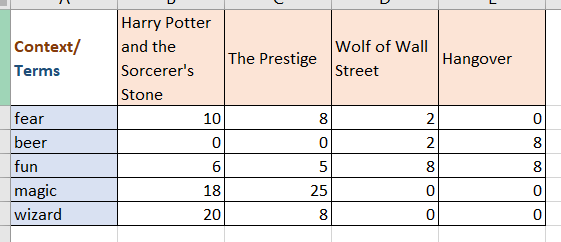

### Application of Occurrence Matrix
### Now if you see one document (which could be tweet) can be represented as a vector of features equal to number of terms.
### e.g. Vector(‘The Prestige’) = 8*’fear’ + 0*’beer’ + 5*’fun’ + 25*’magic’+8*wizard





### Co-occurrence Matrix
### Unlike the Occurrence matrix which is a rectangular matrix, the co-occurrence matrix is a square matrix where it depicts the co-occurrence of two terms in a context. Thus, the co-occurrence matrix is also sometimes called the term-term matrix. It’s a square matrix as the it’s a matrix between each term and another term.
### Typically there are two approaches which are followed
### 1. term-context matrix e.g. Each sentence is represented as a context (there can be other definitions as well). If two terms occur in the same context, they are said to have occurred in the same occurrence context.
### 2. k-skip-n-gram approach e.g. A sliding window will include the (k+n) words. This window will serve as the context now. Terms that co-occur within this context are said to have co-occurred.

### Dis-advantage of term-context matrix is that it will not consider the words which are though close to each other but are in different sentences
### Let’s understand by an example and take following two sentences
### There is a bird sitting on a wall. The cat is sitting on the fence.


### Let’s now look at the k-skip-n-gram matrix and say k=3 and n=2

### 3-skip-2-gram matrix. The co-occurrence will become something like in image below. This will form a sliding window of size 3+2=5 and try to find 2 grams which are no more than 4 words (skip) away.

### term-context co-occurrence matrix





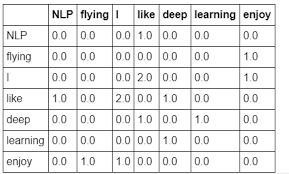

In [4]:
# libraries we'll need
import pandas as pd # dataframes
from io import StringIO # string to data frame
import seaborn as sns # plotting
# read in our data & convert to a data frame
data_tsv = StringIO("""city    province    position
0   Massena     NY  jr
1   Maysville   KY  pm
2   Massena     NY  m
3   Athens      OH  jr
4   Hamilton    OH  sr
5   Englewood   OH  jr
6   Saluda      SC  sr
7   Batesburg   SC  pm
8   Paragould   AR  m""")

my_data_frame = pd.read_csv(data_tsv, delimiter=r"\s+")
my_data_frame.head(2)

,city,province,position
0,Massena,NY,jr
1,Maysville,KY,pm


In [5]:
# conver to co-occurance matrix
co_mat = pd.crosstab(my_data_frame.province, my_data_frame.position)
co_mat

position,jr,m,pm,sr
province,,,,
AR,0,1,0,0
KY,0,0,1,0
NY,1,1,0,0
OH,2,0,0,1
SC,0,0,1,1


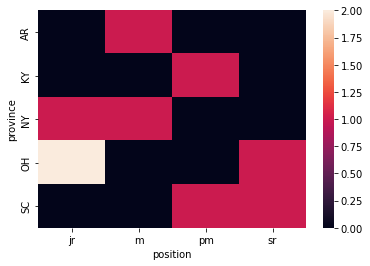

In [6]:
# plot heat map of co-occuance matrix
sns.heatmap(co_mat)

In [17]:
#Word2Vec
#https://www.tensorflow.org/tutorials/text/word2vec
#https://www.kaggle.com/code/vikas15/word-embeddings
#https://www.kaggle.com/code/bulentsiyah/nlp-basics-nltk-skipgram-cbow-reg-exp-stemmer
#https://www.kaggle.com/code/saxinou/word2vec-and-glove


In [18]:
#Loading data
import pandas as pd 
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import os
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('SMS_train.csv',encoding='latin1')
print("Shape",train.shape)
train.tail(2)

Shape (957, 3)


,S. No.,Message_body,Label
955,956,Wat time ü finish?,Non-Spam
956,957,Just glad to be talking to you.,Non-Spam


In [16]:
#train["Label_01"] = train["Label"].astype(int)
train.loc[train['Label'] == 'Non-Spam', 'Label_01'] = 0
train.loc[train['Label'] == 'Spam', 'Label_01'] = 1
train = train[['Message_body','Label_01']]
train.tail(2)

,Message_body,Label_01
955,Wat time ü finish?,0.0
956,Just glad to be talking to you.,0.0
